In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape


(506, 14)

In [ ]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [ ]:
'''=== show the statistics analysis of each attributes ==='''
#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


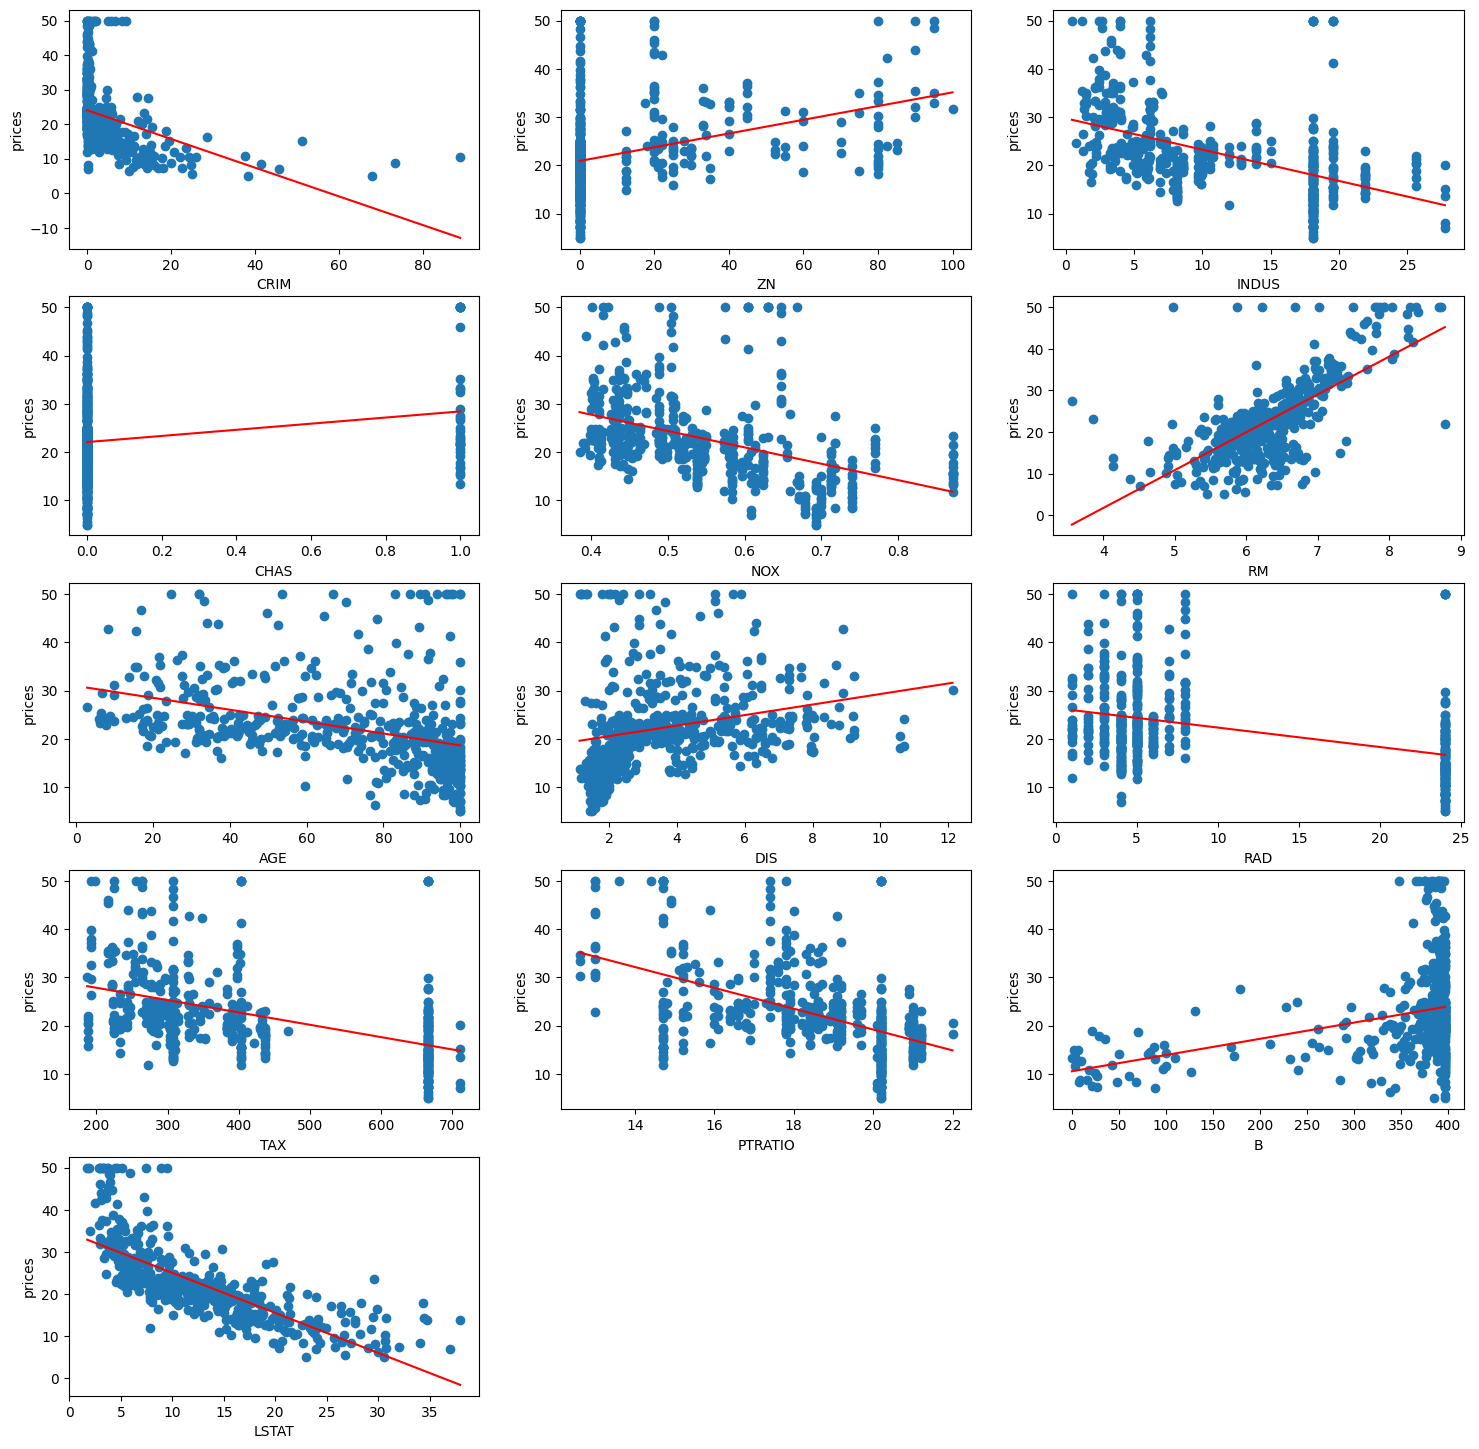

In [ ]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    

In [ ]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [ ]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [ ]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (404, 13)
testing data shape:  (102, 13)


In [ ]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [ ]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=50, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/50
11/11 [==============================] - 3s 34ms/step - loss: 598.3594 - mae: 22.5256 - val_loss: 486.0230 - val_mae: 20.4206
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 412.4519 - mae: 17.6860 - val_loss: 104.5850 - val_mae: 7.2708
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 122.9436 - mae: 9.1409 - val_loss: 64.0047 - val_mae: 6.0499
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 94.3075 - mae: 6.7083 - val_loss: 67.4697 - val_mae: 5.1874
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 78.2286 - mae: 6.6123 - val_loss: 64.6975 - val_mae: 6.4016
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 74.2374 - mae: 6.1420 - val_loss: 57.1546 - val_mae: 4.9971
Epoch 7/50
11/11 [==============================] - 0s 13ms/step - loss: 69.0473 - mae: 6.1124 - val_loss: 59.0401 - val_mae: 5.7574
Epoch 8/50
11/11 [==============================] - 0s 8ms/ste

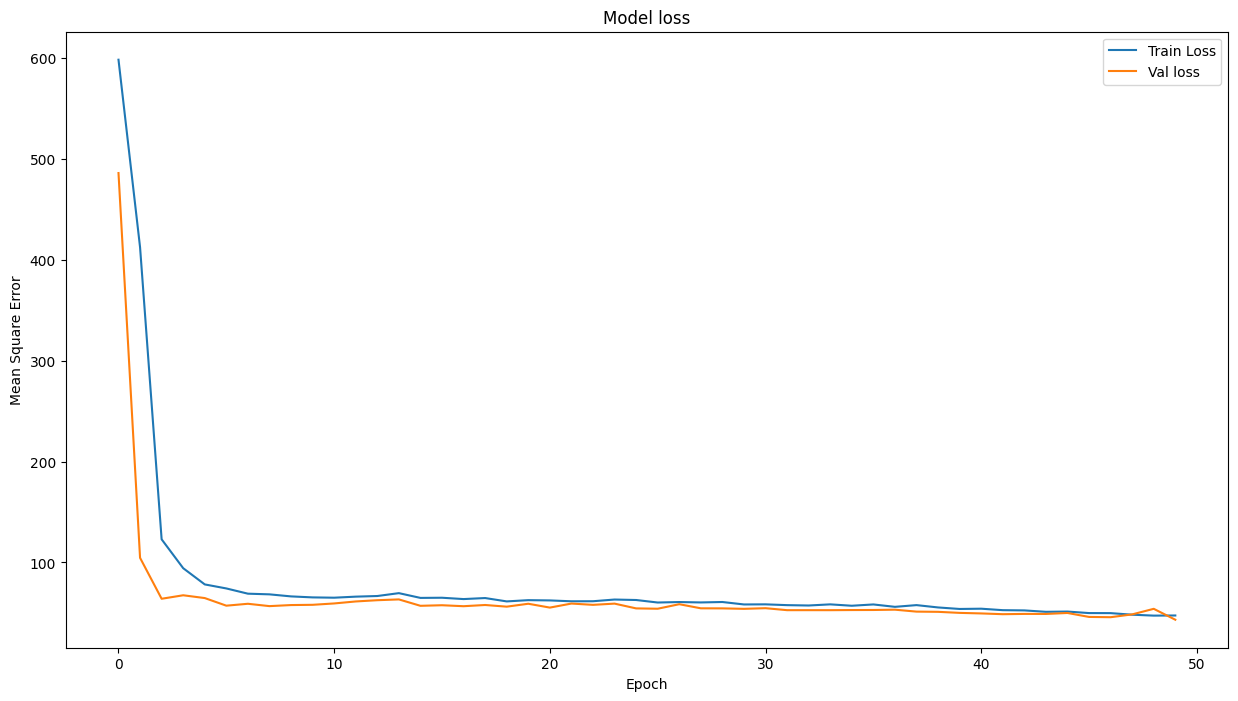

In [ ]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

4/4 [==============================] - 0s 7ms/step - loss: 31.1633 - mae: 3.9595
loss value:  31.163301467895508
Mean absolute error:  3.9594788551330566


In [ ]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

4/4 [==============================] - 0s 6ms/step
[27.014832  31.67992   17.337608  25.912615  18.176363  21.468733
 21.331911  17.081253  19.487755  21.80444   22.934969  22.188976
  8.858819  21.560326  24.715082  19.325558  23.222023  14.463867
 34.31218   17.789099  29.941471  29.521345  18.23851   25.67792
 17.046078  16.913813  22.864435  12.273398  22.936172  21.716642
 24.465643  26.898031  17.922485  19.8481    16.308962  16.477242
 30.073812  27.829607  23.205198  24.578653  19.295889  32.081356
 36.584274  22.794786  27.355307  18.211884  19.956724  25.207691
 18.686266  29.08711   24.27338   32.44711   21.254082  24.250778
 31.49619   19.82698   18.538786  33.631092  27.312218  21.040272
 26.49049   34.644154  27.575165  19.82157   25.12654   20.499931
 18.040943  27.915508  32.630802  12.590248  25.07893   20.46869
 14.269856  27.260561  22.343342  13.14031   22.6128    36.19765
 16.476643  15.7104025 24.521029  15.092454  27.276236  15.759607
 24.705118  25.606092  16.27

In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,27.014832
1,32.4,31.679920
2,13.6,17.337608
3,22.8,25.912615
4,16.1,18.176363
5,20.0,21.468733
6,17.8,21.331911
7,14.0,17.081253
8,19.6,19.487755
9,16.8,21.804440


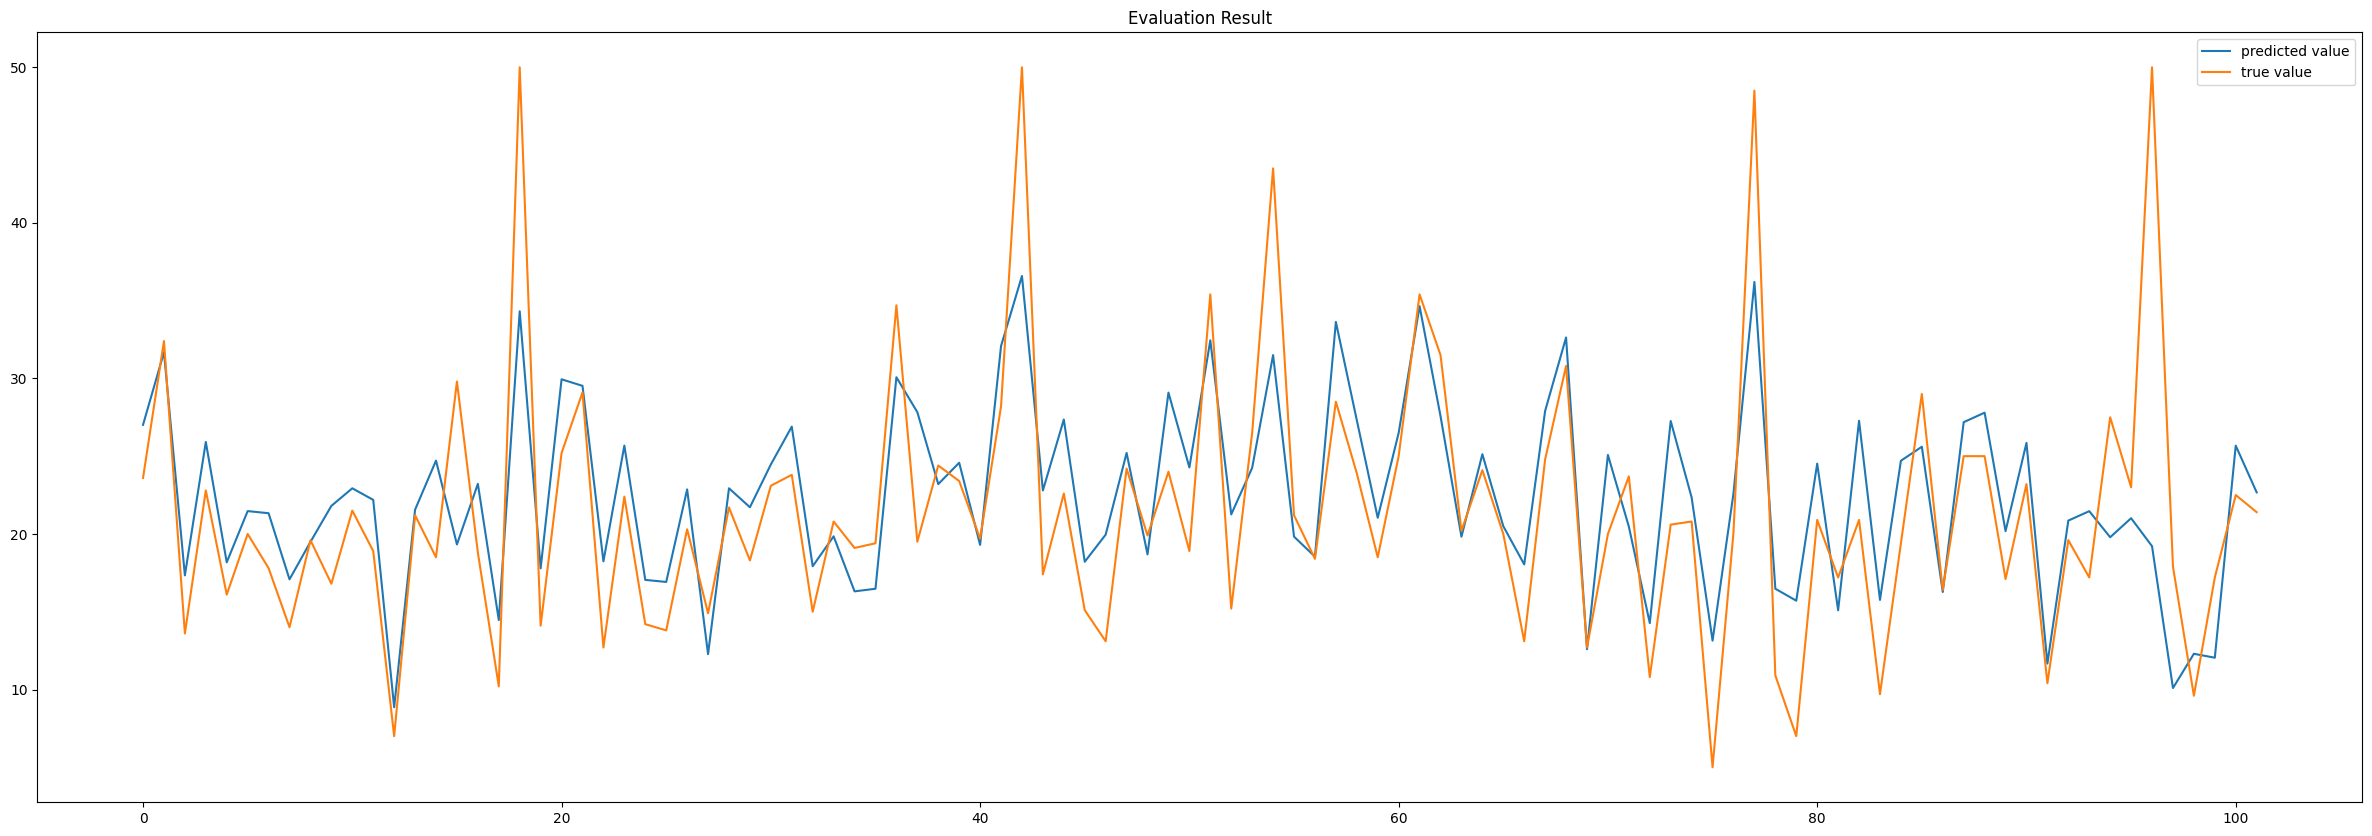

In [ ]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

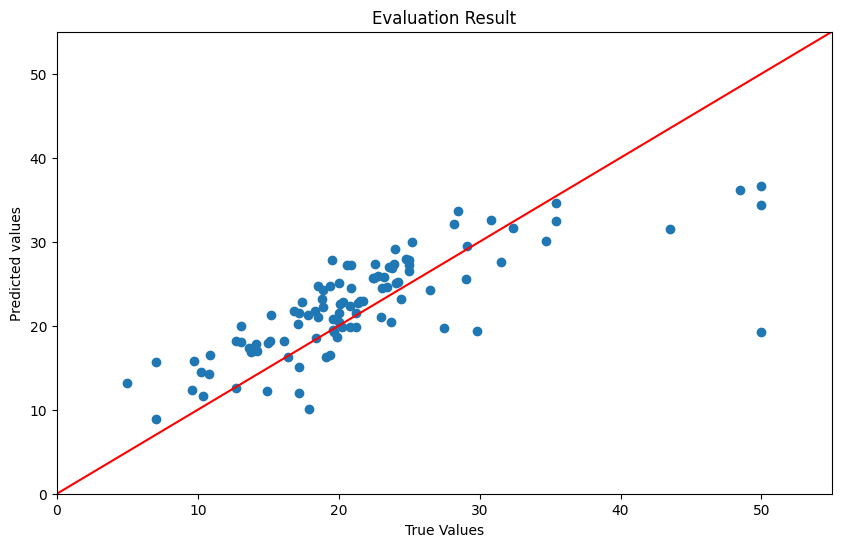

In [ ]:
'''=== Visualize the model evaluation skill ==='''

# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [ ]:
'''   ======= Remove outliers from the data set ========'''
#Tried to see the model perfomance after removing the outliers, the perfomance doesn't show much improvemnt. This might be less data size after remoing the outliers.
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [ ]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [ ]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [ ]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [ ]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (214, 13)
testing data shape:  (54, 13)


In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               2100      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [ ]:
#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=30, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/30
6/6 [==============================] - 1s 46ms/step - loss: 483.3116 - mae: 21.3920 - val_loss: 426.8395 - val_mae: 20.3021
Epoch 2/30
6/6 [==============================] - 0s 14ms/step - loss: 442.7896 - mae: 20.4314 - val_loss: 353.6761 - val_mae: 18.4134
Epoch 3/30
6/6 [==============================] - 0s 13ms/step - loss: 331.5127 - mae: 17.4683 - val_loss: 176.3703 - val_mae: 12.7198
Epoch 4/30
6/6 [==============================] - 0s 10ms/step - loss: 113.6180 - mae: 9.0611 - val_loss: 21.5492 - val_mae: 3.8445
Epoch 5/30
6/6 [==============================] - 0s 13ms/step - loss: 69.7778 - mae: 7.3378 - val_loss: 46.8533 - val_mae: 6.0053
Epoch 6/30
6/6 [==============================] - 0s 14ms/step - loss: 29.7904 - mae: 4.2525 - val_loss: 24.3976 - val_mae: 3.8422
Epoch 7/30
6/6 [==============================] - 0s 10ms/step - loss: 42.1721 - mae: 5.1352 - val_loss: 24.7724 - val_mae: 3.8837
Epoch 8/30
6/6 [==============================] - 0s 10ms/step - loss:

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

2/2 [==============================] - 0s 11ms/step - loss: 16.8318 - mae: 3.0722
loss value:  16.83175277709961
Mean absolute error:  3.0721609592437744


In [ ]:
# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

2/2 [==============================] - 0s 5ms/step
[19.712654 24.1552   22.023508 19.428043 19.807226 23.419975 17.57008
 22.98668  23.09206  23.986984 19.413008 22.785706 23.73959  22.47591
 21.941282 23.551247 23.054379 23.232452 21.240028 19.85474  20.883215
 22.283463 20.858397 23.15225  23.560572 23.824945 21.48028  24.63747
 23.417288 20.143839 24.695375 23.48403  22.698725 17.682276 22.249777
 21.251503 19.53141  22.108397 24.46483  19.38199  21.714445 20.11263
 22.125025 17.656292 22.504675 20.916126 22.722044 22.723639 21.2105
 22.89524  17.489656 17.632534 23.435118 17.80299 ]


In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.0,19.712654
1,18.7,24.155199
2,14.5,22.023508
3,19.1,19.428043
4,18.1,19.807226
5,23.3,23.419975
6,17.7,17.570080
7,23.2,22.986679
8,18.9,23.092060
9,28.0,23.986984


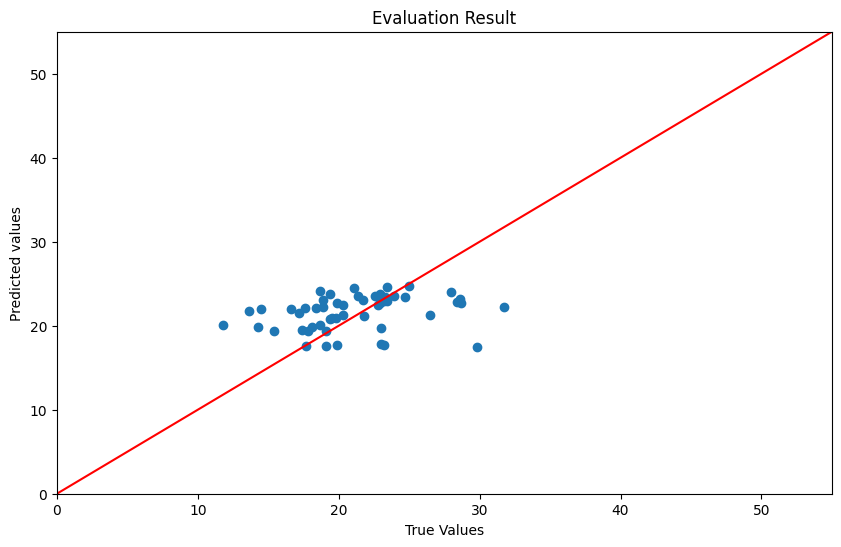

In [ ]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()